## Машинное обучение в бизнесе

### Урок 1. Кейс 1. EDA по Hourly Energy Consumption и Brent

**Задание 1**

Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.



**Ответ**

Как временные ряды можно интерпретировать:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Нельзя интерпретировать:
    
в) количество отказов компьютера,
            Какое-то определенное число
            
г) число обращений в поликлинику по району,
            Какое-то число, указывающее количество посещений по конкретному району

В этих наборах данные не фиксируются в разные периоды времени

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

import pandas_profiling

from sklearn.metrics import mean_squared_error

**Задание 2**

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.


In [2]:
DUQ_hourly = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
DUQ_hourly.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
DUQ_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
DUQ_hourly.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


Text(0, 0.5, 'МВт')

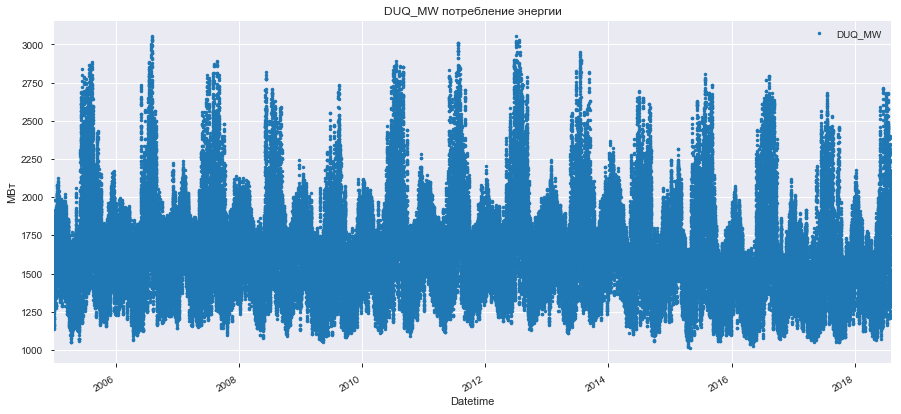

In [6]:
DUQ_hourly.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ_MW потребление энергии' )
plt.ylabel ( 'МВт' )

**На графике видна цикличность данных. Аномалии и выбросы не наблюдаются**

In [7]:
pandas_profiling.ProfileReport(DUQ_hourly)


In [8]:
DUQ_hourly['date'] = DUQ_hourly.index
data_2012 = DUQ_hourly.loc[np.logical_and( np.logical_and( DUQ_hourly['date'].dt.year == 2012 , DUQ_hourly['date'].dt.month == 10), DUQ_hourly['date'].dt.day > 20  )]

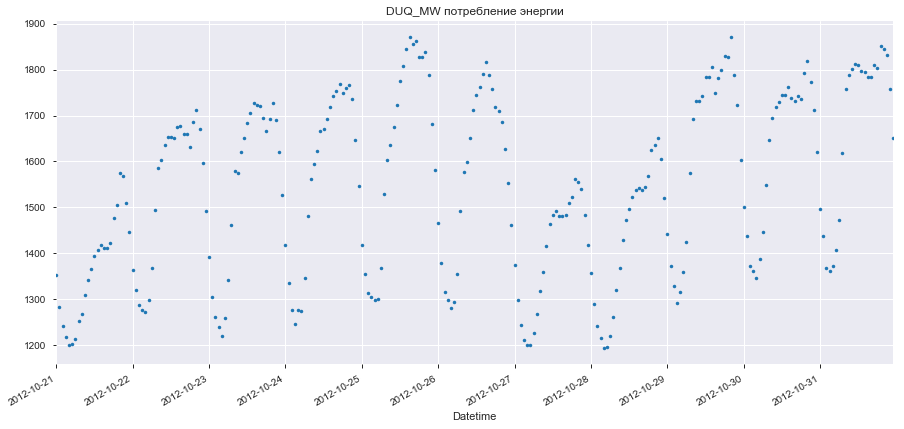

In [9]:
_ = data_2012['DUQ_MW'].plot( style='.', figsize=( 15, 7 ), title='DUQ_MW потребление энергии' )

In [10]:
DUQ_hourly['DUQ_MW'].isnull().sum()

0

Пропусков нет

In [11]:
print('число уникальных значений:',DUQ_hourly['date'].unique().shape[0],', число наблюдений :', DUQ_hourly.shape[0])


число уникальных значений: 119064 , число наблюдений : 119068


Четыре записи повторяются

In [12]:
count_data = DUQ_hourly['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64


day_H=DUQ_hourly['2005-12-31 01:00:00':'2018-01-02 00:00:00'].index.day

Day_count = day_H.value_counts() 
d = Day_count[Day_count != 24].unique()
d

In [13]:
day_H=DUQ_hourly['2017-11-01 00:00:00':'2017-11-10 23:00:00'].index.day
day_H.value_counts()


5     25
10    24
9     24
8     24
7     24
6     24
4     24
3     24
2     24
1     24
Name: Datetime, dtype: int64

**Задание 3**

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.


In [14]:
brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [15]:
brent.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


Перерасчет по неделям

In [16]:
brent.resample("W").mean().head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


Перерасчет по месяцам

In [17]:
brent.resample("M").mean().head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


**Задание 4**

Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.


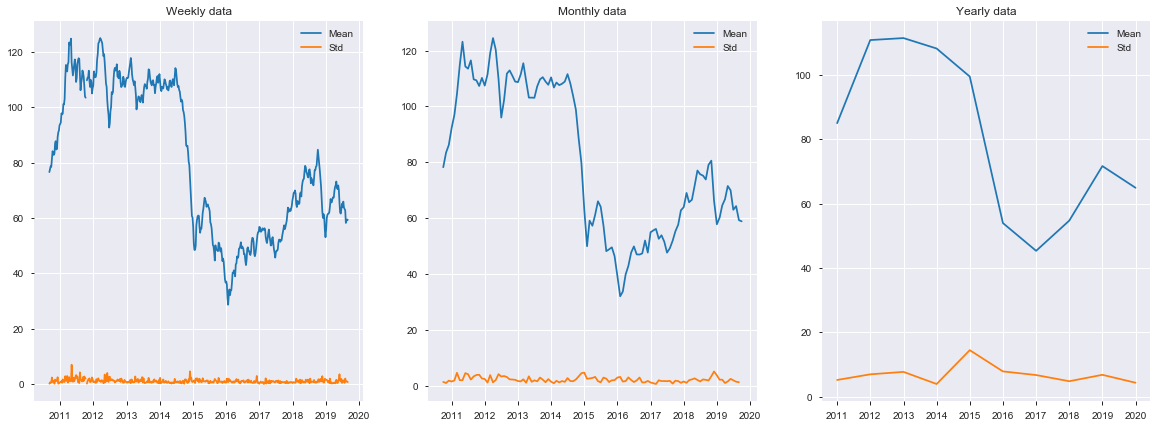

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches (20 , 7)
ax[0].plot(brent.resample("W").mean(), label='Mean')
ax[0].plot(brent.resample("W").std(), label='Std')
ax[0].set_title('Weekly data')
ax[0].legend()

ax[1].plot(brent.resample("M").mean(), label='Mean')
ax[1].plot(brent.resample("M").std(), label='Std')
ax[1].set_title('Monthly data')
ax[1].legend()

ax[2].plot(brent.resample("Y").mean(), label='Mean')
ax[2].plot(brent.resample("Y").std(), label='Std')
ax[2].set_title('Yearly data')
ax[2].legend()

**Задание 5**

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Чем больше период, тем меньше амплитуда. 